In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
#Lendo os dados criados pelo SQL
dados = pd.read_csv('./Resources/dados.csv')
dados.head()

,id_pessoa,id_historico_banco,id_emprestimo,idade,salario_anual,situacao_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_solicitado,taxa_de_juros,possibilidade_inadimplencia,percentual_emprestimo_salario,eh_inadimplente,tempo_primeira_solicitacao_credito
0,CZWcNgWA-kbk4,FxGG9RvP-Le3z,MjTNYsmN-6qBc,26.0,87000.0,Mortgage,9.0,Debtconsolidation,C,25000.0,12.73,0.0,0.29,N,2
1,nf2cYR8g-MgSp,9MX3jpeX-FNdL,gp7W8s0h-4AkX,24.0,49232.0,Rent,8.0,Education,A,8500.0,6.54,0.0,0.17,N,4
2,UEUPY5Ek-pj9X,LmAWWoqo-c9w7,j06x2SYk-I5XL,25.0,128500.0,Mortgage,1.0,Homeimprovement,C,15000.0,12.53,0.0,0.12,Y,3
3,2YbxH3jQ-simk,iDMvnFJD-B1oi,Wcsvj4l2-rpwN,35.0,50000.0,Mortgage,0.0,Education,C,5600.0,12.53,0.0,0.11,Y,7
4,wBIlOptl-jfvn,GmrY0YvB-GNOA,4qWQT7R6-qzXP,22.0,44582.0,Rent,6.0,Homeimprovement,A,4000.0,5.99,1.0,0.09,N,4


In [116]:
dados.shape

(14952, 15)

In [117]:
#Visão geral dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id_pessoa                           14952 non-null  object 
 1   id_historico_banco                  14952 non-null  object 
 2   id_emprestimo                       14952 non-null  object 
 3   idade                               14819 non-null  float64
 4   salario_anual                       14809 non-null  float64
 5   situacao_propriedade                14800 non-null  object 
 6   tempo_trabalho                      14389 non-null  float64
 7   motivo_emprestimo                   14844 non-null  object 
 8   pontuacao_emprestimo                14828 non-null  object 
 9   valor_solicitado                    14813 non-null  float64
 10  taxa_de_juros                       13384 non-null  float64
 11  possibilidade_inadimplencia         14795

In [118]:
dados.describe().round(2)

,idade,salario_anual,tempo_trabalho,valor_solicitado,taxa_de_juros,possibilidade_inadimplencia,percentual_emprestimo_salario,tempo_primeira_solicitacao_credito
count,14819.00,14809.00,14389.00,14813.00,13384.00,14795.00,14812.00,14952.00
mean,27.76,65206.10,4.82,9558.86,11.01,0.22,0.17,5.84
std,6.33,48398.45,4.09,6321.03,3.24,0.41,0.11,4.09
min,20.00,4000.00,0.00,700.00,5.42,0.00,0.01,2.00
25%,23.00,38400.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,78262.00,7.00,12000.00,13.48,0.00,0.23,8.00
max,144.00,1200000.00,34.00,35000.00,23.22,1.00,0.76,30.00


Porcentagem de vazios

In [119]:
(dados.isnull().sum() / dados.shape[0] * 100 ).round(2)

id_pessoa                              0.00
id_historico_banco                     0.00
id_emprestimo                          0.00
idade                                  0.89
salario_anual                          0.96
situacao_propriedade                   1.02
tempo_trabalho                         3.77
motivo_emprestimo                      0.72
pontuacao_emprestimo                   0.83
valor_solicitado                       0.93
taxa_de_juros                         10.49
possibilidade_inadimplencia            1.05
percentual_emprestimo_salario          0.94
eh_inadimplente                        1.08
tempo_primeira_solicitacao_credito     0.00
dtype: float64

In [153]:
# Por enquanto decidi remover os dados dos inadimplentes que estão vazios
dados_v2 = dados.dropna(subset='eh_inadimplente').copy()
print(dados_v2.shape)
print((dados_v2.isnull().sum() / dados_v2.shape[0] * 100 ).round(2))

(14791, 15)
id_pessoa                              0.00
id_historico_banco                     0.00
id_emprestimo                          0.00
idade                                  0.82
salario_anual                          0.85
situacao_propriedade                   0.95
tempo_trabalho                         3.67
motivo_emprestimo                      0.63
pontuacao_emprestimo                   0.74
valor_solicitado                       0.87
taxa_de_juros                         10.41
possibilidade_inadimplencia            0.91
percentual_emprestimo_salario          0.83
eh_inadimplente                        0.00
tempo_primeira_solicitacao_credito     0.00
dtype: float64


Renomeando eh_inadimplente

In [154]:
#Não rodado
dicionario = {
    'Y': 1,
    'N': 0,
}
dados_v2['eh_inadimplente'].replace(dicionario, inplace=True)
dados_v2.head()

,id_pessoa,id_historico_banco,id_emprestimo,idade,salario_anual,situacao_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_solicitado,taxa_de_juros,possibilidade_inadimplencia,percentual_emprestimo_salario,eh_inadimplente,tempo_primeira_solicitacao_credito
0,CZWcNgWA-kbk4,FxGG9RvP-Le3z,MjTNYsmN-6qBc,26.0,87000.0,Mortgage,9.0,Debtconsolidation,C,25000.0,12.73,0.0,0.29,0,2
1,nf2cYR8g-MgSp,9MX3jpeX-FNdL,gp7W8s0h-4AkX,24.0,49232.0,Rent,8.0,Education,A,8500.0,6.54,0.0,0.17,0,4
2,UEUPY5Ek-pj9X,LmAWWoqo-c9w7,j06x2SYk-I5XL,25.0,128500.0,Mortgage,1.0,Homeimprovement,C,15000.0,12.53,0.0,0.12,1,3
3,2YbxH3jQ-simk,iDMvnFJD-B1oi,Wcsvj4l2-rpwN,35.0,50000.0,Mortgage,0.0,Education,C,5600.0,12.53,0.0,0.11,1,7
4,wBIlOptl-jfvn,GmrY0YvB-GNOA,4qWQT7R6-qzXP,22.0,44582.0,Rent,6.0,Homeimprovement,A,4000.0,5.99,1.0,0.09,0,4


In [159]:
dados_v2.dtypes

id_pessoa                              object
id_historico_banco                     object
id_emprestimo                          object
idade                                 float64
salario_anual                         float64
situacao_propriedade                   object
tempo_trabalho                        float64
motivo_emprestimo                      object
pontuacao_emprestimo                   object
valor_solicitado                      float64
taxa_de_juros                         float64
possibilidade_inadimplencia           float64
percentual_emprestimo_salario         float64
eh_inadimplente                         int64
tempo_primeira_solicitacao_credito      int64
dtype: object

Separando os dados em variaveis quantitativas, qualitativas e na de predicao

In [186]:
qualitativas = pd.DataFrame()
quantitativas = pd.DataFrame()
for col in dados_v2.columns:
    if(dados_v2[col].dtype == object):
        qualitativas[col] = dados_v2[col]
    else:
        quantitativas[col] = dados_v2[col]

In [187]:
qualitativas.drop(['id_pessoa', 'id_historico_banco', 'id_emprestimo'], axis=1, inplace=True)
qualitativas['eh_inadimplente'] = dados_v2['eh_inadimplente']
qualitativas.head()

,situacao_propriedade,motivo_emprestimo,pontuacao_emprestimo,eh_inadimplente
0,Mortgage,Debtconsolidation,C,0
1,Rent,Education,A,0
2,Mortgage,Homeimprovement,C,1
3,Mortgage,Education,C,1
4,Rent,Homeimprovement,A,0


In [188]:
quantitativas.head()

,idade,salario_anual,tempo_trabalho,valor_solicitado,taxa_de_juros,possibilidade_inadimplencia,percentual_emprestimo_salario,eh_inadimplente,tempo_primeira_solicitacao_credito
0,26.0,87000.0,9.0,25000.0,12.73,0.0,0.29,0,2
1,24.0,49232.0,8.0,8500.0,6.54,0.0,0.17,0,4
2,25.0,128500.0,1.0,15000.0,12.53,0.0,0.12,1,3
3,35.0,50000.0,0.0,5600.0,12.53,0.0,0.11,1,7
4,22.0,44582.0,6.0,4000.0,5.99,1.0,0.09,0,4


### Explorando comportamento das qualitativas

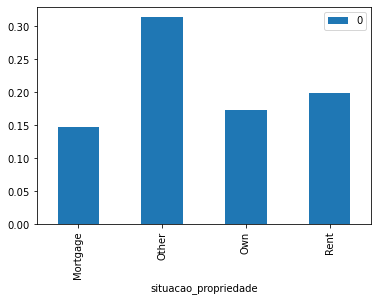

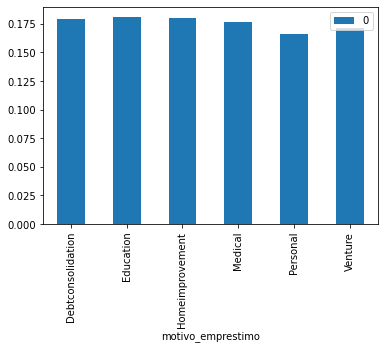

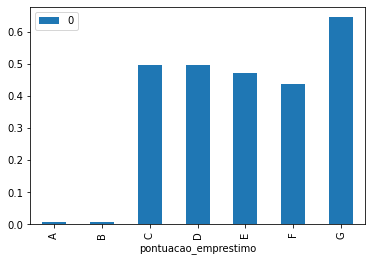

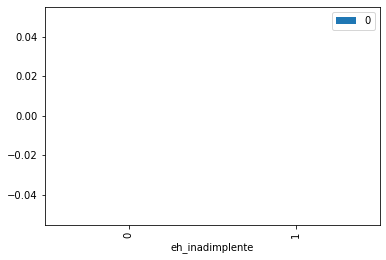

In [228]:
for col in qualitativas:
    aux_pagantes = qualitativas.groupby(['eh_inadimplente', col]).size()[0]
    aux_inadiplente = qualitativas.groupby(['eh_inadimplente', col]).size()[1]
    porcentagem_inadimplencia_grupo = aux_inadiplente/ (aux_pagantes+aux_inadiplente)
    
    pd.DataFrame(porcentagem_inadimplencia_grupo).plot.bar()

<AxesSubplot:>

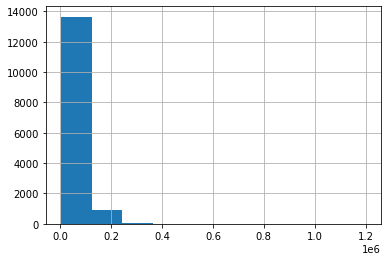

In [237]:
 quantitativas['salario_anual'].hist()